In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.model_selection import train_test_split
import plotly.express as px


In [22]:
data = pd.read_csv("BankChurners.csv",low_memory=False)

In [23]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

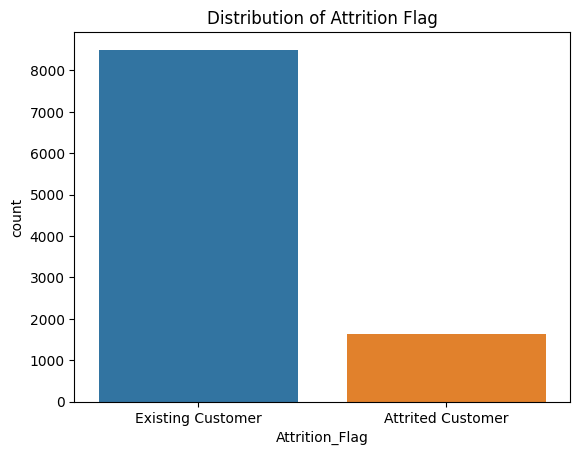

In [25]:
sns.countplot(x='Attrition_Flag', data=data)
plt.title('Distribution of Attrition Flag')
plt.show()


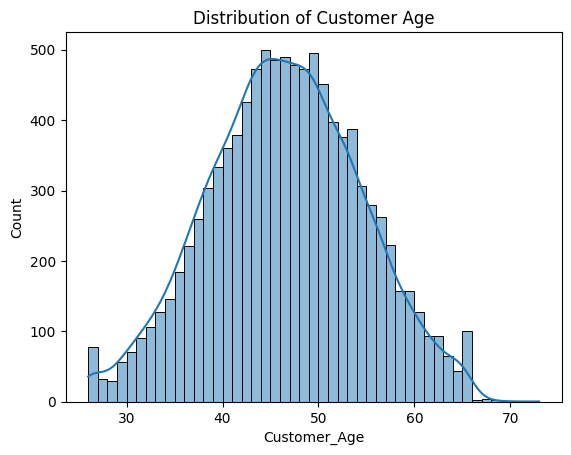

In [26]:
sns.histplot(data['Customer_Age'], kde=True)
plt.title('Distribution of Customer Age')
plt.show()

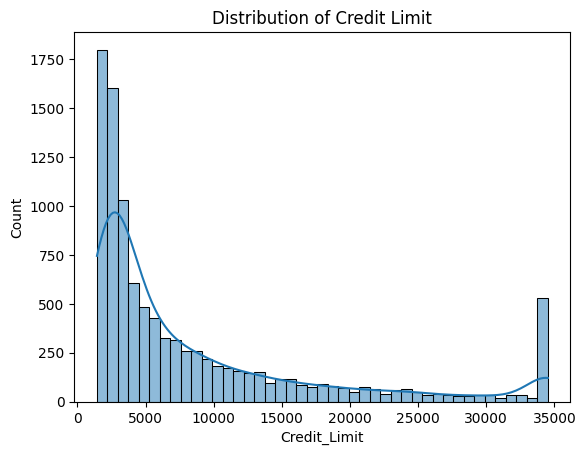

In [27]:
sns.histplot(data['Credit_Limit'], kde=True)
plt.title('Distribution of Credit Limit')
plt.show()


In [28]:
data = data.drop(columns=['CLIENTNUM',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [29]:
data.isnull().sum()


Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [30]:
data.duplicated().sum()

0

10


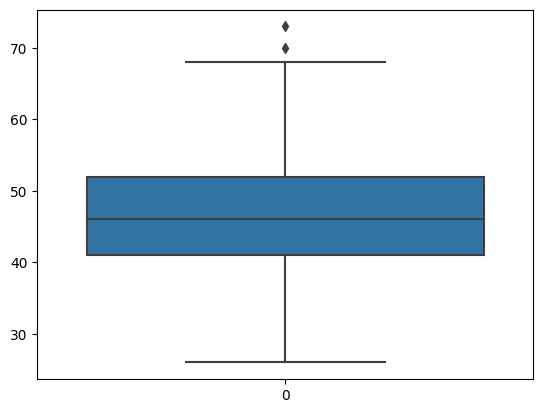

In [31]:
sns.boxplot(data = data['Customer_Age'])
count = (data['Customer_Age'] >65).sum()
print(count)

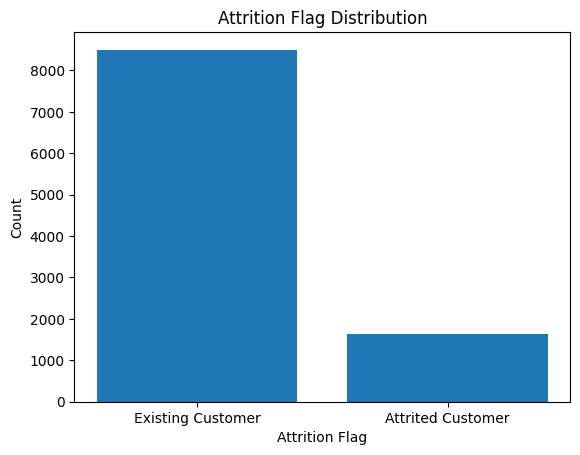

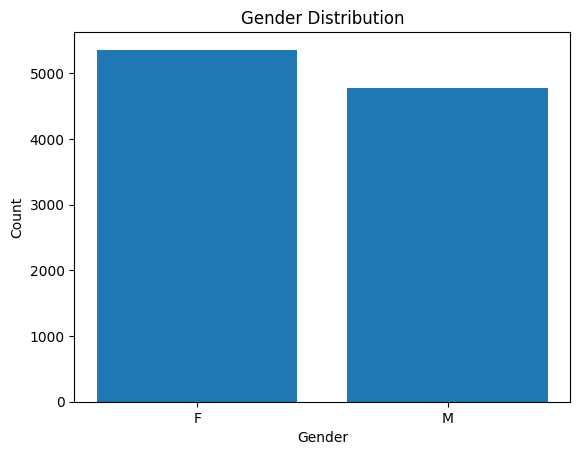

In [32]:
count = data['Attrition_Flag'].value_counts()

plt.bar(count.index, count.values)
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.title('Attrition Flag Distribution')
plt.show()
count2 = data['Gender'].value_counts()

plt.bar(count2.index, count2.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

In [33]:
counts_Acc_stat=data['Attrition_Flag'].value_counts()
fig = px.pie(values=data['Attrition_Flag'].value_counts(), names=counts_Acc_stat.index,title="customer activity")
fig.show()


In [34]:
Attrition_by_Gender = data.groupby(['Gender','Attrition_Flag']).size()
Attrition_by_Gender = Attrition_by_Gender.reset_index(name="Count")

Attrition_by_Gender['Percentage'] = Attrition_by_Gender['Count'] / Attrition_by_Gender['Count'].sum() * 100

total_counts = Attrition_by_Gender.groupby('Gender')['Count'].transform('sum')
Attrition_by_Gender['Percentage_Gender'] = (Attrition_by_Gender['Count'] / total_counts) * 100
Attrition_by_Gender


,Gender,Attrition_Flag,Count,Percentage,Percentage_Gender
0,F,Attrited Customer,930,9.183371,17.357223
1,F,Existing Customer,4428,43.724696,82.642777
2,M,Attrited Customer,697,6.882591,14.615223
3,M,Existing Customer,4072,40.209341,85.384777


In [43]:
encoder = LabelEncoder()
onehot = OneHotEncoder()

columns = ['Attrition_Flag','Income_Category','Card_Category','Gender']
for col in columns:
  data[col] = encoder.fit_transform(data[col])

data = pd.get_dummies(data,columns=['Education_Level','Marital_Status'], drop_first=True).astype(int)

In [44]:
data['Avg_Trans_value'] = data['Total_Trans_Amt']/data['Total_Trans_Ct']
data['Total_Chng_Q4_Q1'] = (data['Total_Amt_Chng_Q4_Q1']+ data['Total_Ct_Chng_Q4_Q1'])/2
data.replace([float('inf'), float('-inf')], 0, inplace=True)
data.fillna(0, inplace=True)
data.head()


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Avg_Trans_value,Total_Chng_Q4_Q1
0,1,45,1,3,2,0,39,5,1,3,...,0,1,0,0,0,1,0,0,27.238095,1.0
1,1,49,0,5,4,0,44,6,1,2,...,1,0,0,0,0,0,1,0,39.121212,2.0
2,1,51,1,3,3,0,36,4,1,0,...,1,0,0,0,0,1,0,0,94.350000,2.0
3,1,40,0,4,4,0,34,3,4,1,...,0,1,0,0,0,0,0,1,58.550000,1.5
4,1,40,1,3,2,0,21,5,1,0,...,0,0,0,1,0,1,0,0,29.142857,2.0


In [45]:
X = data.drop(columns=['Attrition_Flag'])
y = data['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## ML Model Training

In [47]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### 01 . Random Forest Classification

In [61]:
rf_model = RandomForestClassifier(random_state=42, class_weight="balanced")  # Handle imbalance
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [57]:
rf_pred = rf_model.predict(X_test)
rf_preds_proba = rf_model.predict_proba(X_test)[:, 1]

In [58]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.85       325
           1       0.96      0.98      0.97      1701

    accuracy                           0.96      2026
   macro avg       0.94      0.90      0.91      2026
weighted avg       0.96      0.96      0.95      2026



In [59]:
roc_auc_score(y_test, rf_preds_proba)

0.9872518428073984

### 02 . XgBoost Model

In [62]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

In [51]:
xgbmodel = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgbmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [52]:
xgb_pred = xgbmodel.predict(X_test)
xgb_preds_proba = xgbmodel.predict_proba(X_test)[:, 1]

In [54]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       325
           1       0.99      0.97      0.98      1701

    accuracy                           0.96      2026
   macro avg       0.91      0.95      0.93      2026
weighted avg       0.96      0.96      0.96      2026



In [55]:
roc_auc_score(y_test, xgb_preds_proba)

0.9889223533667978

-- Shivam Borse